In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
data=pd.read_json('/content/P1- BankStatements.json')
transactions = data['Account']['Transactions']['Transaction']
df = pd.json_normalize(transactions)
df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


In [194]:
df.shape

(985, 9)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  985 non-null    object
 1   mode                  985 non-null    object
 2   amount                985 non-null    object
 3   currentBalance        985 non-null    object
 4   transactionTimestamp  985 non-null    object
 5   valueDate             985 non-null    object
 6   txnId                 985 non-null    object
 7   narration             985 non-null    object
 8   reference             985 non-null    object
dtypes: object(9)
memory usage: 69.4+ KB


In [196]:
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df['valueDate'] = pd.to_datetime(df['valueDate'])
df['amount'] = df['amount'].astype(float)
df['currentBalance'] = df['currentBalance'].astype(float)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   type                  985 non-null    object                   
 1   mode                  985 non-null    object                   
 2   amount                985 non-null    float64                  
 3   currentBalance        985 non-null    float64                  
 4   transactionTimestamp  985 non-null    datetime64[ns, UTC+05:30]
 5   valueDate             985 non-null    datetime64[ns]           
 6   txnId                 985 non-null    object                   
 7   narration             985 non-null    object                   
 8   reference             985 non-null    object                   
dtypes: datetime64[ns, UTC+05:30](1), datetime64[ns](1), float64(2), object(5)
memory usage: 69.4+ KB


In [198]:
df.duplicated().sum()

0

In [199]:
df['reference'].unique()

array(['NA', '920020066838981', '922020004688715'], dtype=object)

# 1.  Transaction Analysis:
   - What is the total number of transactions made over the year?


In [200]:
df_filtered = df[df['valueDate'].dt.year == 2023]
total_transactions = len(df_filtered)
print(f'Total number of transactions in 2023: {total_transactions}')

Total number of transactions in 2023: 431


- What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)

<Axes: xlabel='amount', ylabel='Density'>

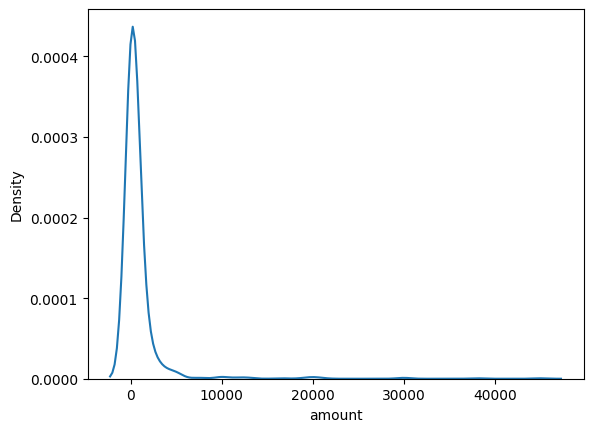

In [201]:
sns.kdeplot(data=df, x='amount')

In [202]:
df['amount'].describe()

count      985.000000
mean       855.492802
std       3007.515100
min          1.000000
25%         40.000000
50%        160.000000
75%        500.000000
max      45000.000000
Name: amount, dtype: float64

* Answer:- Let's consider transaction above 500  as LARGE transaction and remaining as SMALL transaction.

In [203]:
new_df=df.copy()
new_df['TransactionCategory'] = new_df['amount'].apply(lambda x: 'Small' if x <= 500 else 'Large')
new_df.sample(3)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,TransactionCategory
22,DEBIT,UPI,1.0,1154.80,2023-08-25 16:15:02+05:30,2023-08-25,S16919432,UPI/360322594403/161502/UPI/paytm-53692591payt,NA,Small
760,DEBIT,UPI,130.0,4206.21,2024-04-17 17:40:36+05:30,2024-04-17,S2870270,UPI/410819831990/174035/UPI/q197781220ybl/UPI,NA,Small
72,CREDIT,OTHERS,350.0,3029.80,2023-09-13 06:36:06+05:30,2023-09-13,S61221395,NEFT-AXNPN32564161171-PHONEPE PRIVATE LIMITED-...,922020004688715,Small


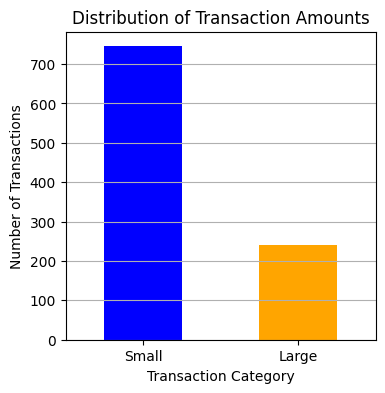

Distribution of transaction amounts:
TransactionCategory
Small    745
Large    240
Name: count, dtype: int64


In [204]:
category_distribution = new_df['TransactionCategory'].value_counts()
plt.figure(figsize=(4, 4))
category_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(f'Distribution of transaction amounts:\n{category_distribution}')

- Analyze the frequency of different transaction types (debit vs. credit).

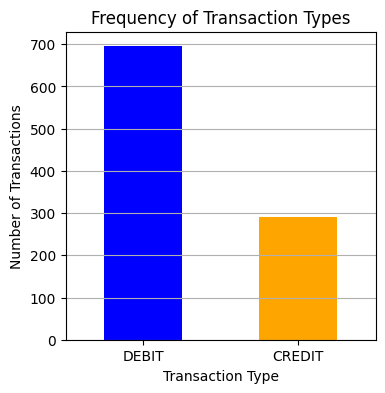

Distribution of transaction amounts:
type
DEBIT     695
CREDIT    290
Name: count, dtype: int64


In [205]:
transaction_type_frequency = df['type'].value_counts()

plt.figure(figsize=(4, 4))
transaction_type_frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(f'Distribution of transaction amounts:\n{transaction_type_frequency}')

# 2.  Balance Analysis:
   - What is the trend of the account balance over time?


In [206]:
new_df['SignedAmount'] = new_df.apply(lambda row: row['amount'] if row['type'].lower() == 'credit' else -row['amount'], axis=1)
new_df.sort_values(by='valueDate', inplace=True)
initial_balance = 0
new_df['Balance'] = new_df['SignedAmount'].cumsum() + initial_balance

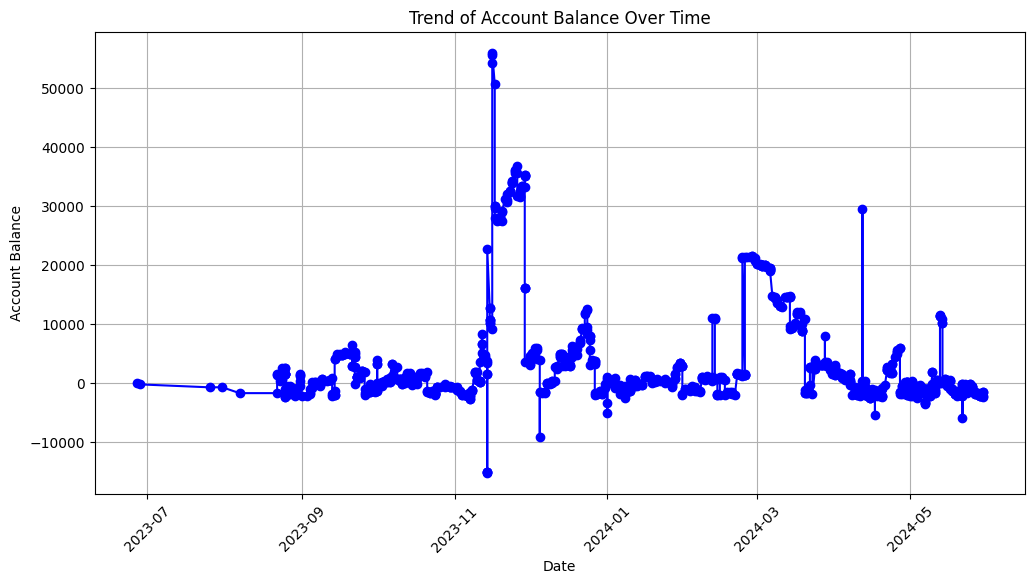

   valueDate  Balance
0 2023-06-27   -100.0
1 2023-06-28   -270.0
2 2023-07-26   -770.0
3 2023-07-31   -755.0
4 2023-08-07  -1755.0


In [207]:
    plt.figure(figsize=(12, 6))
    plt.plot(new_df['valueDate'], new_df['Balance'], marker='o', linestyle='-', color='blue')
    plt.title('Trend of Account Balance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Account Balance')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    print(new_df[['valueDate', 'Balance']].head())

* Identify any periods with significant changes in the account balance.
*Answer:- In the period of November 2023 to December 2023 exponential incerase in Account Balance happens.

# 3.  Spending Patterns:
   - What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?


In [208]:
def categorize_transaction(narration):
    categories = {
        'Fuel': ['FILLING STATIO', 'PETROL', 'GAS'],
        'Ecommerce': ['AMAZON', 'FLIPKART', 'EBAY'],
        'Food': ['RESTAURANT', 'CAFE', 'FOOD'],
        'Shopping': ['MALL', 'SHOP', 'STORE'],
        'ATM Withdrawals': ['ATM'],
        'UPI Transactions': ['UPI', 'PAYMENT']
    }

    for category, keywords in categories.items():
        if any(keyword in narration for keyword in keywords):
            return category
    return 'Others'

# Apply categorization
new_df['category'] = new_df['narration'].apply(categorize_transaction)
new_df.drop(columns=['SignedAmount', 'TransactionCategory', 'Balance'], inplace=True)
new_df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,category
0,DEBIT,CARD,100.0,2180.8,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,Fuel
1,DEBIT,CARD,170.0,2010.8,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,Fuel
2,DEBIT,CARD,500.0,1510.8,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,Fuel
3,CREDIT,OTHERS,15.0,1525.8,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,Others
4,DEBIT,ATM,1000.0,525.8,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA,ATM Withdrawals


In [209]:
new_df['category'].value_counts()

category
UPI Transactions    789
Others              189
Fuel                  4
ATM Withdrawals       3
Name: count, dtype: int64

In [210]:
df['mode'].value_counts()

mode
UPI       789
OTHERS    188
CARD        4
ATM         3
CASH        1
Name: count, dtype: int64

- Analyze the frequency and amount of spending in each category.

In [211]:
mode_summary = new_df.groupby('mode').agg(
    total_amount=('amount', 'sum'),
    transaction_count=('amount', 'count')
).reset_index()
mode_summary.sort_values(by='total_amount', ascending=False)

,mode,total_amount,transaction_count
4,UPI,587092.90,789
3,OTHERS,196237.51,188
2,CASH,45000.00,1
0,ATM,13500.00,3
1,CARD,830.00,4


# 4.  Income Analysis:
   - What are the main sources of income (e.g., salary, UPI credits)?


In [212]:
x=new_df[new_df['type']=='CREDIT']
x.groupby('mode')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

,mode,amount
1,OTHERS,196237.51
2,UPI,179333.00
0,CASH,45000.00


   - Identify any patterns in the timing and amount of income received.

<ipython-input-213-2fd19ed65e88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df['date'] = credit_df['transactionTimestamp'].dt.date
<ipython-input-213-2fd19ed65e88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df['month'] = credit_df['transactionTimestamp'].dt.month
<ipython-input-213-2fd19ed65e88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

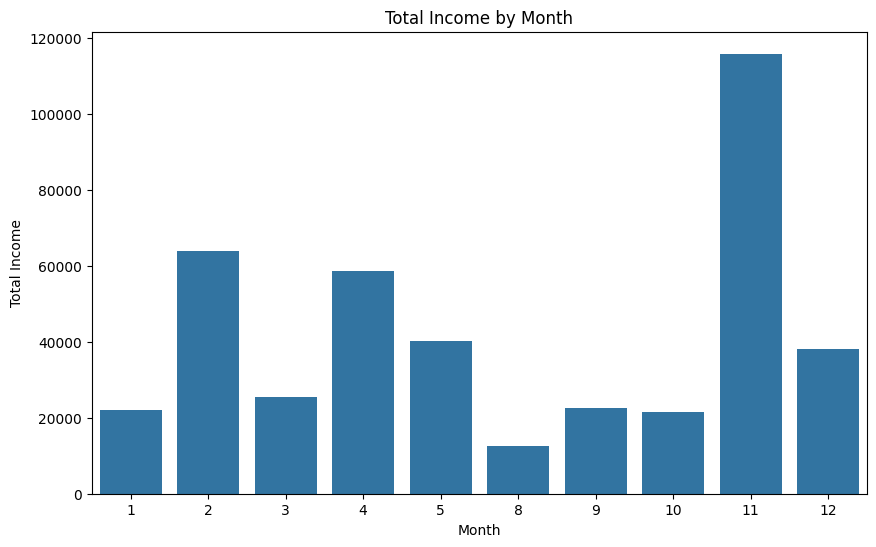

<ipython-input-213-2fd19ed65e88>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=credit_df, x='weekday', y='amount', estimator=sum, ci=None)


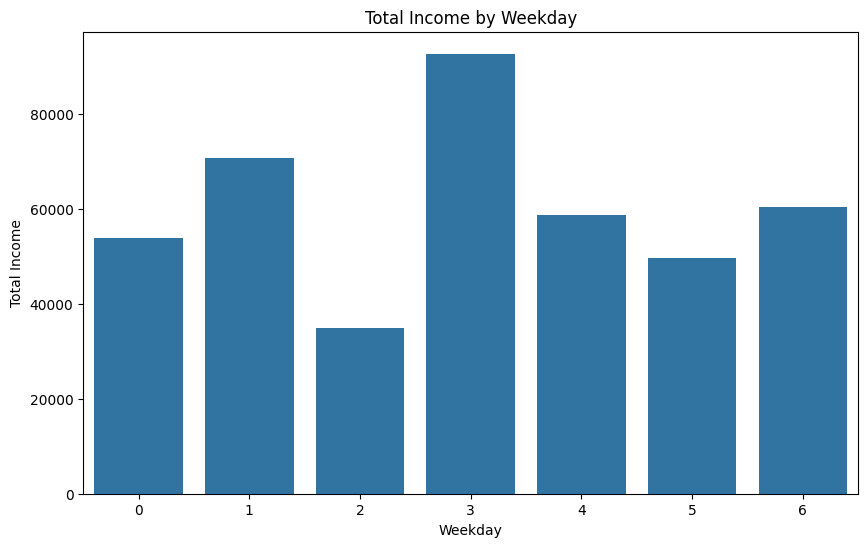

<ipython-input-213-2fd19ed65e88>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=credit_df, x='hour', y='amount', estimator=sum, ci=None)


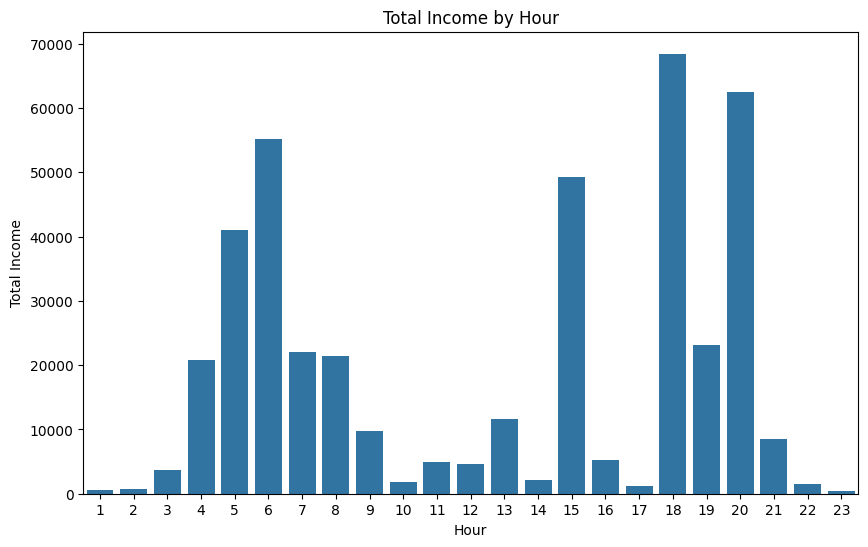

In [213]:
credit_df = df[df['type'] == 'CREDIT']
credit_df['date'] = credit_df['transactionTimestamp'].dt.date
credit_df['month'] = credit_df['transactionTimestamp'].dt.month
credit_df['day'] = credit_df['transactionTimestamp'].dt.day
credit_df['weekday'] = credit_df['transactionTimestamp'].dt.weekday
credit_df['hour'] = credit_df['transactionTimestamp'].dt.hour
timing_summary = credit_df.groupby(['month', 'day', 'weekday', 'hour']).agg(
    total_income=('amount', 'sum'),
    income_count=('amount', 'count')
).reset_index()
timing_summary

import matplotlib.pyplot as plt
import seaborn as sns

# by month
plt.figure(figsize=(10, 6))
sns.barplot(data=credit_df, x='month', y='amount', estimator=sum, ci=None)
plt.title('Total Income by Month')
plt.xlabel('Month')
plt.ylabel('Total Income')
plt.show()

# by weekday
plt.figure(figsize=(10, 6))
sns.barplot(data=credit_df, x='weekday', y='amount', estimator=sum, ci=None)
plt.title('Total Income by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Income')
plt.show()

# by hour
plt.figure(figsize=(10, 6))
sns.barplot(data=credit_df, x='hour', y='amount', estimator=sum, ci=None)
plt.title('Total Income by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Income')
plt.show()

# 5.  Alert Generation:
   - Identify any unusual or suspicious transactions.


In [214]:
mean_amount = df['amount'].mean()
std_amount = df['amount'].std()
threshold = 3 * std_amount

df['is_suspicious'] = (df['amount'] > mean_amount + threshold) | (df['amount'] < mean_amount - threshold)

# (between 10 PM and 6 AM)
df['hour'] = df['transactionTimestamp'].dt.hour
df['is_unusual_hour'] = (df['hour'] < 6) | (df['hour'] > 22)

# suspicious transactions
df['alert'] = df['is_suspicious'] | df['is_unusual_hour']
df.drop(columns=['hour', 'narration'], inplace=True)
df.sample(5)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,reference,is_suspicious,is_unusual_hour,alert
360,DEBIT,UPI,40.0,2179.80,2023-12-08 10:25:11+05:30,2023-12-08,S24488413,NA,False,False,False
33,DEBIT,UPI,60.0,1835.80,2023-08-26 21:29:53+05:30,2023-08-26,S68128680,NA,False,False,False
925,CREDIT,OTHERS,1070.0,1119.31,2024-05-21 05:47:33+05:30,2024-05-21,S39063328,922020004688715,False,True,True
983,DEBIT,UPI,130.0,771.41,2024-05-30 13:30:30+05:30,2024-05-30,S4676116,NA,False,False,False
390,CREDIT,OTHERS,1820.0,8440.80,2023-12-18 19:03:32+05:30,2023-12-18,S79868584,NA,False,False,False


In [215]:
df['alert'].value_counts()

alert
False    878
True     107
Name: count, dtype: int64

   - Generate alerts for low balance or high expenditure periods.

In [216]:
low_balance_threshold = 1000.0
df['low_balance_alert'] = df['currentBalance'] < low_balance_threshold

In [217]:
daily_expenditure_threshold = 500.0
daily_expenditure = df[df['type'] == 'DEBIT'].groupby('valueDate').agg(
    daily_expenditure=('amount', 'sum')
).reset_index()
daily_expenditure['high_expenditure_alert'] = daily_expenditure['daily_expenditure'] > daily_expenditure_threshold

df = df.merge(daily_expenditure[['valueDate', 'high_expenditure_alert']], on='valueDate', how='left')

df['high_expenditure_alert'] = df['high_expenditure_alert'].fillna(False)

df.drop(columns=['reference', 'is_suspicious', 'is_unusual_hour', 'alert'], inplace=True)
df['alert'] = df['low_balance_alert'] | df['high_expenditure_alert']

df.sample(5)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,low_balance_alert,high_expenditure_alert,alert
694,DEBIT,UPI,50.0,4063.11,2024-04-01 16:16:35+05:30,2024-04-01,C12458820,False,True,True
595,DEBIT,UPI,130.0,22106.91,2024-03-03 19:37:48+05:30,2024-03-03,S42315682,False,False,False
95,CREDIT,UPI,1.0,5151.80,2023-09-21 18:29:38+05:30,2023-09-21,S7953606,False,True,True
521,DEBIT,UPI,10.0,869.81,2024-02-06 11:15:11+05:30,2024-02-06,S12120402,True,False,True
176,DEBIT,UPI,310.0,2648.80,2023-10-10 20:31:14+05:30,2023-10-10,S88248536,False,False,False
